# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices with visualization and pandas skills.
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports


In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2017 to Jan 1st 2019 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [15]:
starttime=datetime.datetime(2017,1,1)
endtime=datetime.datetime(2019,1,1)

In [23]:
# Bank of America
BAC=data.DataReader('BAC','iex',starttime,endtime)

#Citi
C=data.DataReader('C','iex',starttime,endtime)

# Goldman Sachs
GS = data.DataReader("GS", 'iex', starttime,endtime)

#JPMorgan
JPM=data.DataReader('JPM','iex',starttime,endtime)

#Morgan Stanley
MS=data.DataReader('MS','iex',starttime,endtime)

#Wells Fargo
WFC=data.DataReader('WFC','iex',starttime,endtime)

In [24]:
BAC.head(4)

open     high      low    close    volume
date                                                    
2017-01-03  21.8468  21.9241  21.4601  21.7791  99298080
2017-01-04  21.9628  22.1948  21.8468  22.1851  76875052
2017-01-05  22.0595  22.1658  21.6003  21.9241  86826447
2017-01-06  22.0208  22.0885  21.8081  21.9241  66281476

In [25]:
# Could also do this for a Panel Object
df=data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'iex',starttime,endtime)

In [26]:
df.head(4)

Attributes     open                                                   high  \
Symbols         BAC        C        GS      JPM       MS      WFC      BAC   
date                                                                         
2017-01-03  21.8468  58.1055  236.4239  82.8066  41.0594  52.1258  21.9241   
2017-01-04  21.9628  58.1150  235.1965  82.9025  41.2595  52.5846  22.1948   
2017-01-05  22.0595  58.3832  236.4434  82.7595  41.4787  51.9572  22.1658   
2017-01-06  22.0208  58.1055  236.0245  82.3591  41.5073  51.7419  22.0885   

Attributes                              ...     close                    \
Symbols           C        GS      JPM  ...        GS      JPM       MS   
date                                    ...                               
2017-01-03  58.4981  238.6352  83.2048  ...  235.3232  82.7023  41.0213   
2017-01-04  59.0152  237.0279  83.1122  ...  236.8428  82.8548  41.5645   
2017-01-05  58.8236  236.9426  83.0455  ...  235.0796  82.0922  41.1833   
2017-01-06  58.2587  239.8334  82.5784  ...  238.5671  82.1017  41.7836   

Attributes             volume                                                  
Symbols         WFC       BAC         C       GS       JPM       MS       WFC  
date                                                                           
2017-01-03  52.4348  99298080  18322398  4384246  20550714  8316914  22063790  
2017-01-04  52.4816  76875052  16947520  2728709  15266596  7747375  15036148  
2017-01-05  51.6670  86826447  18317911  3562618  14300816  9883202  18831628  
2017-01-06  51.5359  66281476  16778439  3591079  12893298  9152750  18715908  

[4 rows x 30 columns]

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [27]:
tickers=['BAC','C','JPM','MS','WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [30]:
bank_stocks=pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)
# axis : {0/’index’, 1/’columns’}, default 0. The axis to concatenate along
# keys: Add a hierarchical index at the outermost level of the data with the keys option.
# >>> pd.concat([s1, s2], keys=['s1', 's2',])
# s1  0    a
#     1    b
# s2  0    c
#     1    d

bank_stocks.head(4)

BAC                                             C           \
               open     high      low    close    volume     open     high   
date                                                                         
2017-01-03  21.8468  21.9241  21.4601  21.7791  99298080  58.1055  58.4981   
2017-01-04  21.9628  22.1948  21.8468  22.1851  76875052  58.1150  59.0152   
2017-01-05  22.0595  22.1658  21.6003  21.9241  86826447  58.3832  58.8236   
2017-01-06  22.0208  22.0885  21.8081  21.9241  66281476  58.1055  58.2587   

                                        ...       MS                    \
                low    close    volume  ...     open     high      low   
date                                    ...                              
2017-01-03  57.2149  58.0193  18322398  ...  82.8066  83.2048  81.5171   
2017-01-04  58.0384  58.8045  16947520  ...  82.9025  83.1122  82.3686   
2017-01-05  57.3681  57.7799  18317911  ...  82.7595  83.0455  81.2808   
2017-01-06  57.5309  57.9810  16778439  ...  82.3591  82.5784  81.9301   

                                   WFC                                      
              close    volume     open     high      low    close   volume  
date                                                                        
2017-01-03  82.7023  20550714  41.0594  41.5740  40.4496  41.0213  8316914  
2017-01-04  82.8548  15266596  41.2595  41.7550  41.0118  41.5645  7747375  
2017-01-05  82.0922  14300816  41.4787  41.5740  40.2018  41.1833  9883202  
2017-01-06  82.1017  12893298  41.5073  42.0504  41.1452  41.7836  9152750  

[4 rows x 25 columns]

** Set the column name levels:**

In [31]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [36]:
bank_stocks.head(4)

Bank Ticker      BAC                                             C           \
Stock Info      open     high      low    close    volume     open     high   
date                                                                          
2017-01-03   21.8468  21.9241  21.4601  21.7791  99298080  58.1055  58.4981   
2017-01-04   21.9628  22.1948  21.8468  22.1851  76875052  58.1150  59.0152   
2017-01-05   22.0595  22.1658  21.6003  21.9241  86826447  58.3832  58.8236   
2017-01-06   22.0208  22.0885  21.8081  21.9241  66281476  58.1055  58.2587   

Bank Ticker                              ...       MS                    \
Stock Info       low    close    volume  ...     open     high      low   
date                                     ...                              
2017-01-03   57.2149  58.0193  18322398  ...  82.8066  83.2048  81.5171   
2017-01-04   58.0384  58.8045  16947520  ...  82.9025  83.1122  82.3686   
2017-01-05   57.3681  57.7799  18317911  ...  82.7595  83.0455  81.2808   
2017-01-06   57.5309  57.9810  16778439  ...  82.3591  82.5784  81.9301   

Bank Ticker                         WFC                                      
Stock Info     close    volume     open     high      low    close   volume  
date                                                                         
2017-01-03   82.7023  20550714  41.0594  41.5740  40.4496  41.0213  8316914  
2017-01-04   82.8548  15266596  41.2595  41.7550  41.0118  41.5645  7747375  
2017-01-05   82.0922  14300816  41.4787  41.5740  40.2018  41.1833  9883202  
2017-01-06   82.1017  12893298  41.5073  42.0504  41.1452  41.7836  9152750  

[4 rows x 25 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [37]:
# DataFrame.xs(key, axis=0, level=None, drop_level=True)[source]
# Return cross-section from the Series/DataFrame.

In [41]:
# Check the cross section of close column:
bank_stocks.xs(key='close',axis=1,level='Stock Info').head(4)

Bank Ticker      BAC        C       JPM       MS      WFC
date                                                     
2017-01-03   21.7791  58.0193  235.3232  82.7023  41.0213
2017-01-04   22.1851  58.8045  236.8428  82.8548  41.5645
2017-01-05   21.9241  57.7799  235.0796  82.0922  41.1833
2017-01-06   21.9241  57.9810  238.5671  82.1017  41.7836

In [43]:
# Get max close price based on previous df:
bank_stocks.xs(key='close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     32.3681
C       77.7974
JPM    270.4223
MS     116.8560
WFC     57.4768
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [44]:
returns=pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [ ]:
# Pandas.pct_change(): Percentage change between the current and a prior element.

In [45]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['close'].pct_change()
returns.head()

BAC Return  C Return  JPM Return  MS Return  WFC Return
date                                                               
2017-01-03         NaN       NaN         NaN        NaN         NaN
2017-01-04    0.018642  0.013533    0.006458   0.001844    0.013242
2017-01-05   -0.011765 -0.017424   -0.007445  -0.009204   -0.009171
2017-01-06    0.000000  0.003480    0.014835   0.000116    0.014576
2017-01-09   -0.005729 -0.005450   -0.008208   0.000697   -0.025998

** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

In [46]:
import seaborn as sns

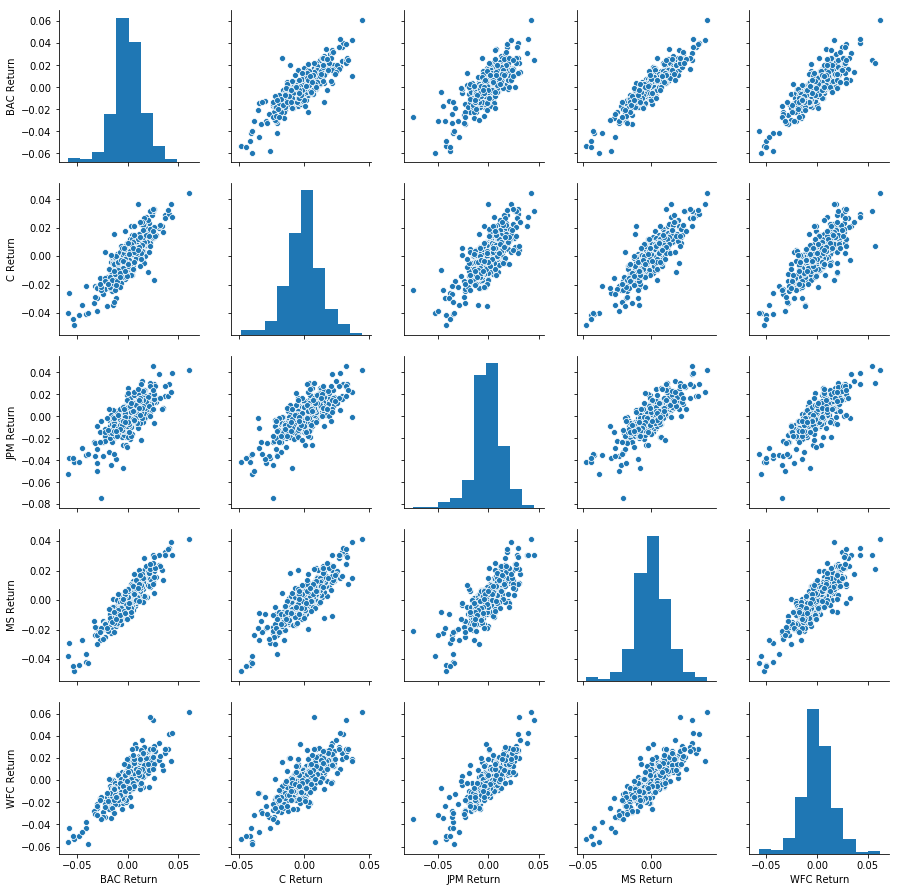

In [48]:
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [ ]:
# pandas.Series.idxmin():This method returns the label of the minimum

In [49]:
returns.idxmin()

BAC Return    2017-05-17
C Return      2018-02-05
JPM Return    2018-11-12
MS Return     2018-02-05
WFC Return    2018-05-29
dtype: object

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [50]:
returns.idxmax()

BAC Return    2018-12-26
C Return      2018-12-26
JPM Return    2017-02-03
MS Return     2018-12-26
WFC Return    2018-12-26
dtype: object

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period?**

In [53]:
returns.std() # WFC  rsikiest

BAC Return    0.014662
C Return      0.013262
JPM Return    0.014430
MS Return     0.012226
WFC Return    0.015309
dtype: float64

##### A standard deviation close to 0 indicates that the data points tend to be very close to the mean (also called the expected value) of the set,
##### while a high standard deviation indicates that the data points are spread out over a wider range of values.

* Which would you classify as the riskiest for the year 2018?

In [55]:
returns.ix['2018-01-01':'2018-12-31'].std()
#Pandas DataFrame.ix[ ] is both Label and Integer based slicing technique:
# x1 = data.ix[:4, ] #Slicing only rows(till index 4):") 0,1,2,3,4
# x2 = data.ix[:4, 1:4] #Slicing rows and columns(rows=4, col 1-4, excluding 4).

c:\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


BAC Return    0.015546
C Return      0.015104
JPM Return    0.016160
MS Return     0.013931
WFC Return    0.017200
dtype: float64

* WFC Return worst!

** Create a distplot using seaborn of the 2018 returns for Morgan Stanley **

c:\python37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


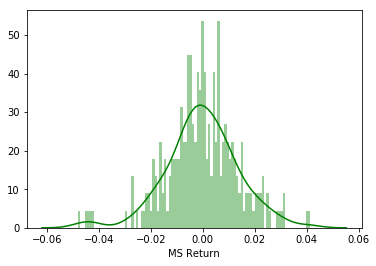

In [57]:
import matplotlib.pyplot as plt
sns.distplot(returns.ix['2018-01-01':'2018-12-30']['MS Return'], color='green', bins=100)

** Create a distplot using seaborn of the 2018 returns for CitiGroup **

____
The ix[] indexer is a hybrid of .loc and .iloc. Generally, ix is label based and acts just as the .loc indexer. However, .ix also supports integer type selections (as in .iloc) where passed an integer. This only works where the index of the DataFrame is not integer based. ix will accept any of the inputs of .loc and .iloc.
____

c:\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


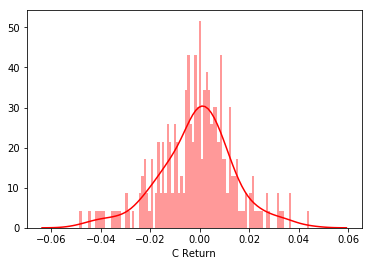

In [62]:
sns.distplot(returns.ix['2018-01-01':'2018-12-30']['C Return'], color='red', bins=100)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

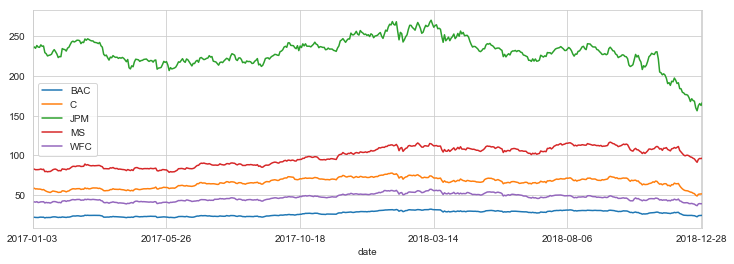

In [65]:
for tick in tickers:
    bank_stocks[tick]['close'].plot(figsize=(12,4), label=tick)
plt.legend()

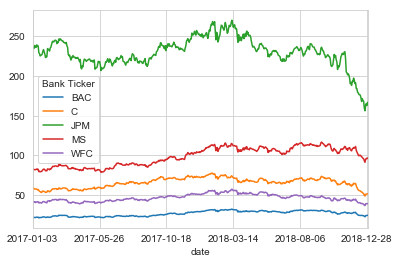

In [72]:
bank_stocks.xs(key='close', axis=1, level='Stock Info').plot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2018. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2018**

c:\python37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

c:\python37\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



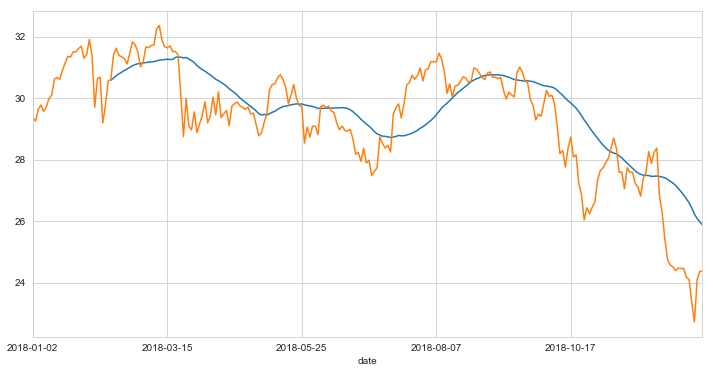

In [97]:
plt.figure(figsize=(12,6))
BAC['close'].ix['2018-01-01':'2018-12-30'].rolling(window=30).mean().plot(label='30 Day Avg')
#pandas.dataframe.rolling(): Provides rolling window calculations.
#DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None)

BAC['close'].ix['2018-01-01':'2018-12-30'].plot(label='BAC CLOSE')

** Create a heatmap of the correlation between the stocks Close Price.**

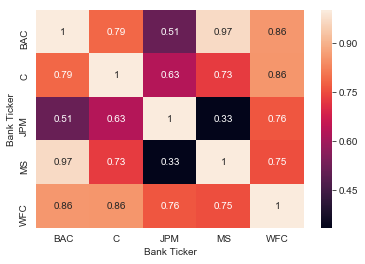

In [79]:
sns.heatmap(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(), annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

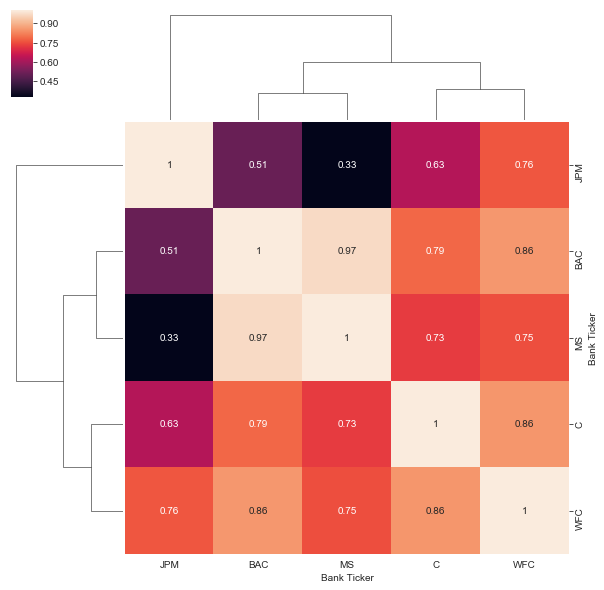

In [85]:
sns.clustermap(bank_stocks.xs(key='close', axis=1, level='Stock Info').corr(), annot=True)

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [87]:
BAC[['open','high','low','close']].ix['2018-01-01':'2018-12-30'].iplot(kind='candle')

c:\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2018.**

* Cufflinks v0.6.0 includes a set of Technical Analysis studies for financial data. These are accessed with a new method called ta_plot.
* Add one or more moving averages to a time series.

In [90]:
MS[['open','high','low','close']].ix['2018-01-01':'2018-12-30'].ta_plot(study='sma', title='Simple Moving Averages')

c:\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2018.**

In [95]:
BAC[['open','high','low','close']].ix['2018-01-01':'2018-12-30'].ta_plot(study='boll', periods=14,title='Bollinger Bands')

c:\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.